# Exploration Notes

Oh this one has so many fun moments! There's this one, right now. Where my kernal didn't shut down effectively so I'm having to re-type the notebook (at least I can clean while I re-type, and it wasn't as bad as it could have been!)

There's me struggling all day to finally find a function that works, to find out that Raf shared a way to do just that in the first two minutes of the Violin Plots video! That's alright, I just keep repeating my mantra for the week: "It's not wasted time if you learned something.... right?!"

First, I pull in the dfGenreFin info and the unique genres list. I dropped unnecessary columns, and we decided on our main list of genres.

Then I graphed the mean gross by genre and the mean production budget by genre; along with the top 7 and 5 from each.

Then I tried playing around with Seaborn, and attempted to chart the two of these together. That's when I realized that I was going to have to stack the data by Genre - which took another frustratingly long time to pull a dataframe together for. 

Alas! We have persevered, and managed to plot an ugly little violin chart that displays the instances of ROI on the top 5 grossing genres(mean).


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
%store -r dfGenreFin

In [4]:
dfGenreFin.rename(columns = {'index' : 'title'}, inplace = True)
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


- Pulling in list of unique genres

In [5]:
%store -r oneGenreList

In [6]:
uniqueGenres = oneGenreList['genres'].unique()

In [7]:
uniqueGenres

array(['Drama', 'Comedy', 'Biography', 'History', 'Documentary', 'Sci-Fi',
       'Thriller', 'Horror', 'Action', 'Adventure', 'Fantasy', 'Musical',
       'Western', 'Romance', 'Mystery', 'Crime', 'Animation', 'Family',
       'Sport', 'Music', 'News', 'Talk-Show', 'Reality-TV', 'War',
       'Game-Show'], dtype=object)

In [8]:
len(uniqueGenres)

25

# Getting information ready for plotting

- Or so I thought!

In [9]:
from importlib import reload
import functions as fun

reload(fun)

<module 'functions' from 'C:\\Users\\kekay\\flatiron\\Module01\\Project\\dsc-mod-1-project-v2-1-onl01-dtsc-ft-041320\\functions.py'>

In [10]:
fun.count('News', dfGenreFin)

11

Ignore:
- Game-Show : 0
- Reality-TV : 0
- Talk-Show : 0
- News : 11 (Featured in other genres as well)

In [11]:
genreList = ['Action', 'Adventure', 'Animation', 'Biography', 'Drama', 'Comedy', 'History', 
             'Documentary', 'Sci-Fi', 'Thriller', 'Horror', 'Fantasy', 'Musical', 'Western', 'Romance', 
             'Mystery', 'Crime', 'Family', 'Sport', 'Music', 'War']

In [11]:
genreList.sort()
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'History',
 'Horror',
 'Music',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Sport',
 'Thriller',
 'War',
 'Western']

# Mean Gross by Genre

In [12]:
def getMeanGrossData():
    data = []
    for i in genreList:
        data.append(fun.meanGross(i, dfGenreFin))
    return data

In [13]:
meanGrossData = getMeanGrossData()

In [14]:
meanGrossData

[54043316.219251335,
 88147457.58236273,
 83692006.28921568,
 21693540.207407407,
 19737887.80093761,
 33302470.265402842,
 19700843.310526315,
 23248293.022421524,
 82307881.88936171,
 27549630.76994681,
 27129086.14412417,
 66945316.448275864,
 82193277.88636364,
 24682976.085714284,
 17938810.294209704,
 24146523.306060605,
 23121060.36642599,
 60032657.344827585,
 28450808.24742268,
 35340738.59550562,
 14440282.333333334]

In [15]:
grossData = pd.DataFrame({'Genre' : genreList,
                          'Mean Gross' : meanGrossData,})

grossData

,Genre,Mean Gross
0,Action,5.404332e+07
1,Adventure,8.814746e+07
2,Animation,8.369201e+07
3,Biography,2.169354e+07
4,Drama,1.973789e+07
5,Comedy,3.330247e+07
6,History,1.970084e+07
7,Documentary,2.324829e+07
8,Sci-Fi,8.230788e+07
9,Thriller,2.754963e+07


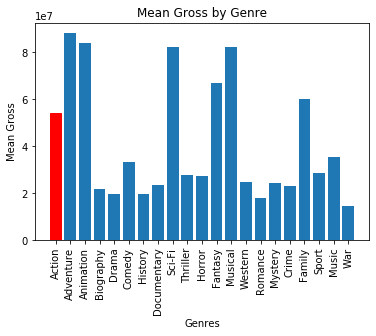

In [16]:
data = meanGrossData
labels = genreList
plt.xticks(range(len(data)), labels, rotation= 90)
plt.xlabel('Genres')
plt.ylabel('Mean Gross')
plt.title('Mean Gross by Genre')
bar_list = plt.bar(range(len(data)), data)



bar_list[0].set_color('r')
plt.show()

- ^ It's definitely gross!

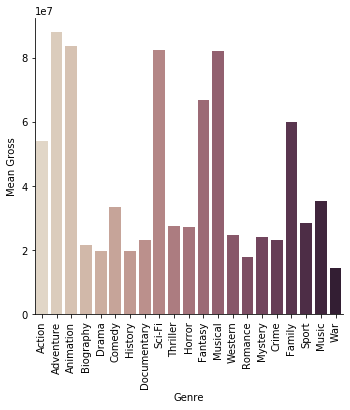

In [17]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette="ch:.25", data= grossData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [54]:
top7GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][0]]
top5GrossingGenres = grossData.loc[grossData['Mean Gross'] >= grossData['Mean Gross'][11]]

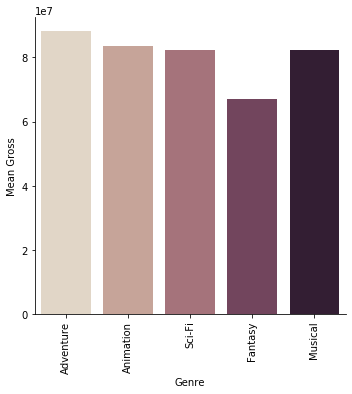

In [55]:
g = sns.catplot(x="Genre", y="Mean Gross", kind="bar", palette="ch:.25", data= top5GrossingGenres);
g.set_xticklabels(rotation = 90)
plt.show()

# Mean Production Budget by Genre

In [20]:
def getMeanBudgetData():
    data = []
    for i in genreList:
        data.append(fun.meanBudget(i, dfGenreFin))
    return data

In [21]:
meanBudgetData = getMeanBudgetData()

In [22]:
budgetData = pd.DataFrame({'Genre' : genreList,
                           'Mean Budget' : meanBudgetData})

budgetData

,Genre,Mean Budget
0,Action,4.673630e+07
1,Adventure,7.063706e+07
2,Animation,5.766503e+07
3,Biography,1.519645e+07
4,Drama,1.521898e+07
5,Comedy,2.178094e+07
6,History,1.639611e+07
7,Documentary,1.833320e+07
8,Sci-Fi,6.229495e+07
9,Thriller,2.084044e+07


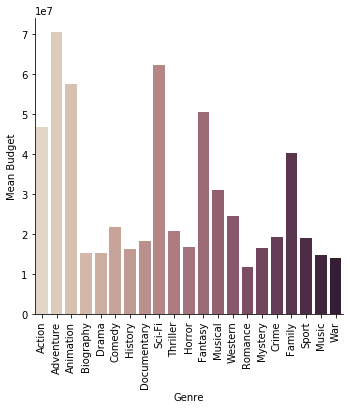

In [23]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= budgetData);
g.set_xticklabels(rotation = 90)
#plt.set_title("Mean Gross by Genre")
plt.show()

In [24]:
top7GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][13]]
top5GenreBudgets = budgetData.loc[budgetData['Mean Budget'] >= budgetData['Mean Budget'][0]]

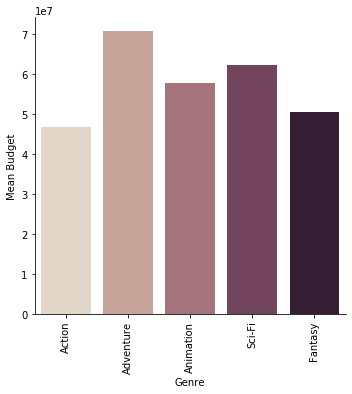

In [25]:
g = sns.catplot(x="Genre", y="Mean Budget", kind="bar", palette="ch:.25", data= top5GenreBudgets);
g.set_xticklabels(rotation = 90)
plt.show()

# Try to graph both mean gross and mean budget

In [26]:
meanData = pd.DataFrame({'Genre' : genreList,
                         'Mean Gross' : meanGrossData,
                         'Mean Budget' : meanBudgetData})

In [27]:
meanData.head()

,Genre,Mean Gross,Mean Budget
0,Action,5.404332e+07,4.673630e+07
1,Adventure,8.814746e+07,7.063706e+07
2,Animation,8.369201e+07,5.766503e+07
3,Biography,2.169354e+07,1.519645e+07
4,Drama,1.973789e+07,1.521898e+07


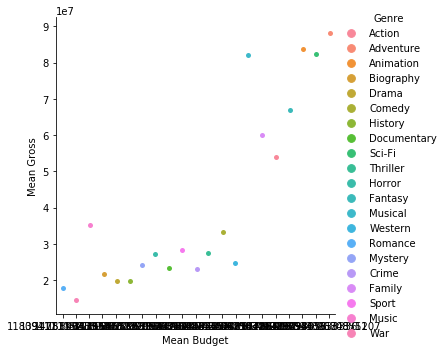

In [28]:
ax = sns.catplot(x= 'Mean Budget', y= 'Mean Gross', hue ='Genre', data = meanData)

- Okay not so much, maybe try something else:

In [29]:
dfGenreFin.head()

,title,studio,domestic_gross,foreign_gross,year,release_date,production_budget,worldwide_gross,original_title,start_year,runtime_minutes,averagerating,numvotes,movie_id,genresList
0,'71,RAtt.,1300000.0,355000.0,2015.0,NaN,0.0,1655000.0,'71,2014.0,99.0,7.2,46103.0,tt2614684,"[Action, Drama, Thriller]"
1,"1,000 Times Good Night",FM,53900.0,0.0,2014.0,NaN,0.0,53900.0,Tusen ganger god natt,2013.0,117.0,7.1,6848.0,tt2353767,"[Drama, War]"
2,10 Cloverfield Lane,Par.,72100000.0,38100000.0,2016.0,"Mar 11, 2016",5000000.0,108286422.0,10 Cloverfield Lane,2016.0,103.0,7.2,260383.0,tt1179933,"[Drama, Horror, Mystery]"
3,10 Days in a Madhouse,NaN,14616.0,0.0,NaN,"Nov 11, 2015",12000000.0,14616.0,10 Days in a Madhouse,2015.0,111.0,6.7,1114.0,tt3453052,[Drama]
4,10 Years,Anch.,203000.0,0.0,2012.0,NaN,0.0,203000.0,10 Years,2011.0,100.0,6.1,22484.0,tt1715873,"[Comedy, Drama, Romance]"


In [30]:
dfGenreFinGrouped = dfGenreFin.groupby(['genresList'])[['domestic_gross', 'foreign_gross', 'worldwide_gross', 'production_budget']]

In [31]:
dfGenreFinGrouped

# Let's group by Genre individually

In [32]:
 def getGenreInfo(keyword):    
    allInfo = {}
    title = []
    genre = []
    domestic_gross = []
    foreign_gross = []
    worldwide_gross = []
    production_budget = []
    for i in dfGenreFin.index:
        
        if any(keyword in g for g in dfGenreFin['genresList'][i]):
            genre.append(keyword)
            title.append(dfGenreFin['title'][i])
            domestic_gross.append(dfGenreFin['domestic_gross'][i])
            foreign_gross.append(dfGenreFin['foreign_gross'][i])
            worldwide_gross.append(dfGenreFin['worldwide_gross'][i])
            production_budget.append(dfGenreFin['production_budget'][i])
        allInfo.update({'Title' : title,
                        'Genre' : genre,
                        'Domestic Gross' : domestic_gross,
                        'Foreign Gross' : foreign_gross,
                        'Worldwide Gross' : worldwide_gross,
                        'Production Budget' : production_budget})
    return allInfo

In [33]:
nextTestDF = pd.DataFrame(getGenreInfo('Action'))
nextTestDF

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0
...,...,...,...,...,...,...
930,You're Next,Action,18500000.0,8387177.0,26887177.0,1000000.0
931,Young Detective Dee: Rise of the Sea Dragon,Action,87800.0,72200000.0,72287800.0,0.0
932,Z Storm,Action,0.0,2053330.0,2053330.0,7000000.0
933,Zombeavers,Action,14900.0,0.0,14900.0,0.0


In [34]:
def getDataForGenres():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))

In [35]:
for i in genreList:
        print(getGenreInfo(i))

{'Title': ["'71", '12 Rounds', '12 Strong', '13 Assassins', '14 Blades', '1911', '2 Guns', '21 Jump Street', '22 Bullets', '22 Jump Street', '3 Days to Kill', '30 Minutes or Less', '300: Rise of an Empire', '47 Ronin', '5 Days of War', '7 Days in Entebbe', 'A Gentleman', 'A Good Day to Die Hard', 'A Melody to Remember', 'A Taxi Driver', 'A Walk Among the Tombstones', 'ATM', 'Abduction', 'Abduction', 'Abduction', 'Abraham Lincoln: Vampire Hunter', 'Act of Valor', 'Action Jackson', 'Adam', 'Admiral', 'Adrift', 'After Earth', 'Agent Vinod', 'Agneepath', 'Air Strike', 'Akira', 'Alex Cross', 'Alita: Battle Angel', 'All Is Lost', 'All or Nothing', 'Allied', 'Along with the Gods: The Two Worlds', 'American Assassin', 'American Heist', 'American Hero', 'American Made', 'American Sniper', 'American Ultra', 'Anna', 'Anonymous', 'Ant-Man', 'Ant-Man and the Wasp', 'Aquaman', "Assassin's Creed", 'Assassins', 'Asura: The City of Madness', 'Atomic Blonde', 'Attack on Titan: Part 1', 'Attack the Block

{'Title': ['A Letter to Momo', 'A Monster Calls', 'A Silent Voice', 'A.C.O.R.N.S.: Operation Crackdown', 'Alpha and Omega', 'Alvin and the Chipmunks: Chipwrecked', 'Alvin and the Chipmunks: The Road Chip', 'Anomalisa', 'April and the Extraordinary World', 'Arthur Christmas', 'As Above, So Below', 'Back to the Jurassic', 'Barbara', 'Batman: The Killing Joke', 'Big Hero 6', 'Bilal: A New Breed of Hero', 'Black Butler: Book of the Atlantic', 'Boruto: Naruto the Movie', 'Brave', 'Captain Underpants: The First Epic Movie', 'Capture the Flag', 'Cars 2', 'Cars 3', 'Chico & Rita', 'Christopher Robin', 'Cloudy with a Chance of Meatballs 2', 'Coco', 'Death of a Superhero', 'Despicable Me', 'Despicable Me 2', 'Despicable Me 3', 'Dinosaur', 'Dinosaur', 'Dragon Ball Super: Broly', 'Dragon Ball Z: Battle of Gods', "Dragon Ball Z: Resurrection 'F'", 'Early Man', 'Eden', 'Epic', 'Ernest & Celestine', 'Evangelion: 3.0 You Can (Not) Redo', "Fate/Stay Night: Heaven's Feel - I. Presage Flower", "Father's 

{'Title': ["'71", '1,000 Times Good Night', '10 Cloverfield Lane', '10 Days in a Madhouse', '10 Years', '1001 Grams', '102 Not Out', '12 Rounds', '12 Strong', '12 Years a Slave', '127 Hours', '13 Assassins', '17 Girls', '1911', '2 Days in New York', '2 States', '20,000 Days on Earth', '20th Century Women', '22 Bullets', '23 Blast', '28 Hotel Rooms', '3', '3', '3', '3', '3 Backyards', '3 Days to Kill', '3 Generations', '360', '42', '45 Years', '47 Meters Down', '47 Ronin', '5 Days of War', '5 Flights Up', '5 to 7', '50 to 1', '50/50', '6 Below: Miracle on the Mountain', '7 Boxes', '7 Days in Entebbe', '90 Minutes in Heaven', '99 Homes', 'A Beautiful Life', 'A Better Life', 'A Better Life', 'A Bigger Splash', 'A Bottle in the Gaza Sea', 'A Brilliant Young Mind', 'A Ciambra', 'A Coffee in Berlin', 'A Cure for Wellness', 'A Dangerous Method', "A Dog's Purpose", 'A Fantastic Woman', 'A Five Star Life', 'A Gentleman', 'A Ghost Story', 'A Girl Walks Home Alone at Night', 'A Hijacking', 'A Hol

{'Title': ['12 Strong', '12 Years a Slave', '14 Blades', '7 Days in Entebbe', 'A Royal Affair', 'A Tale of Love and Darkness', 'A Taxi Driver', 'Above and Beyond', 'Afterimage', 'All or Nothing', 'Alone in Berlin', 'Anthropoid', 'Bajirao Mastani', 'Beginning of the Great Revival', 'Bel Ami', 'Beloved Sisters', 'Beneath Hill 60', 'Bridge of Spies', 'Burke and Hare', 'Capital', 'Cave of Forgotten Dreams', 'Chappaquiddick', 'Child 44', 'Churchill', 'Cinco de Mayo, La Batalla', 'Colette', 'Colette', 'Contact', 'Coriolanus', 'Darkest Hour', 'Deepwater Horizon', 'Detroit', 'Dunkirk', 'Edmond', 'Elvis & Nixon', 'Emperor', 'Enough', 'Escobar: Paradise Lost', 'Even the Rain', 'Experimenter', 'Eyes Wide Open', 'First Man', 'For Greater Glory: The True Story of Cristiada', 'For No Good Reason', 'Fort McCoy', 'Francofonia', 'Frantz', 'Free Men', 'Ghost Town', 'Gold', 'Gold', 'Hacksaw Ridge', 'Hell and Back Again', 'Heneral Luna', 'Hidden Figures', 'Home', 'Home', 'Home', 'Home', 'Hostage', 'In Thi

{'Title': ['A Quiet Place', 'Abduction', 'Absentia', 'Absolutely Anything', 'Alien: Covenant', 'Aliens', 'Alita: Battle Angel', 'American Ultra', 'Anna', 'Another Earth', 'Antiviral', 'Apollo 18', 'Area 51', 'Arrival', 'As Above, So Below', "Assassin's Creed", 'Atlas Shrugged: Who Is John Galt?', 'Attack the Block', 'Avengers: Age of Ultron', 'Avengers: Infinity War', 'Banshee Chapter', 'Battleship', 'Before We Vanish', 'Beyond the Black Rainbow', 'Black Panther', 'Blade Runner 2049', 'Bumblebee', 'Captain America: Civil War', 'Captain America: The First Avenger', 'Captain America: The Winter Soldier', 'Captain Marvel', 'Captive State', 'Cargo', 'Chronicle', 'Circle', 'Control', 'Control', 'Cosmos', 'Cowboys & Aliens', 'Creative Control', 'Creature', 'Dark Phoenix', 'Dark Skies', 'Darkness', 'Dawn of the Crescent Moon', 'Disconnect', 'Doomsday', 'Downsizing', 'Dragonfly', 'Dredd', 'Dune', 'Earth', 'Earth to Echo', 'Edge of Tomorrow', 'Elle', 'Elysium', 'Equals', 'Eva', 'Evolution', 'Ex

{'Title': ['10 Cloverfield Lane', '11-11-11', '13 Sins', '21', '3', '31', '47 Meters Down', '6 Souls', 'A Cure for Wellness', 'A Girl Walks Home Alone at Night', 'A Nightmare on Elm Street', 'A Nightmare on Elm Street', 'A Quiet Place', 'ATM', 'Abduction', 'Abraham Lincoln: Vampire Hunter', 'Absentia', 'Adam', 'Alien: Covenant', 'Alive', 'Alpha', 'Amityville: The Awakening', 'Amy', 'Animal Kingdom', 'Anna', 'Annabelle', 'Annabelle: Creation', 'Annihilation', 'Antiviral', 'Apartment 143', 'Apollo 18', 'Area 51', 'As Above, So Below', 'Aurora', 'Aurora', 'Avatar', 'Bad Samaritan', 'Banshee Chapter', 'Beast', 'Before I Go to Sleep', 'Berberian Sound Studio', 'Better Watch Out', 'Beyond the Black Rainbow', 'Blair Witch', 'Blood Feast', 'Bluebeard', 'Bluebeard', 'Bodom', 'Bone Tomahawk', 'Boo! A Madea Halloween', 'Borgman', 'Braid', 'Brotherly Love', 'Byzantium', 'Cabin Fever', 'Cargo', 'Carrie', 'Carrie', 'Chernobyl Diaries', "Child's Play", 'Circle', 'City of Angels', 'City of Gold', 'Cle

{'Title': ['A Million Ways to Die in the West', 'Blackthorn', 'Branded', 'Casa de mi Padre', 'Destiny', 'Django Unchained', 'Far from Men', 'Frontera', 'Gold', 'Hostiles', 'Jane Got a Gun', 'Jauja', 'Let the Bullets Fly', "Meek's Cutoff", "No Man's Land", 'Red Hill', 'Saving Private Perez', 'Slow West', 'Steel', 'The Divide', 'The Forgotten', 'The Gunman', 'The Homesman', 'The Keeping Room', 'The Kid', 'The Lone Ranger', 'The Magnificent Seven', 'The Return', 'The Rider', 'The Salvation', "The Warrior's Way", 'Trespass', 'True Grit', 'Wild Things', 'Witness'], 'Genre': ['Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western', 'Western'], 'Domestic Gross': [43100000.0, 201000

{'Title': ['10 Cloverfield Lane', '11-11-11', '3', '3', '6 Souls', 'Abduction', 'Absentia', 'Akira', 'Alex Cross', 'Aliens', 'All Good Things', 'Alpha', 'Anna', 'Annabelle', 'Annabelle: Creation', 'Anonymous', 'Apollo 18', 'Arrival', 'As Above, So Below', 'Atlas Shrugged: Who Is John Galt?', 'Atomic Blonde', 'Bad Times at the El Royale', 'Beast', 'Beast', 'Before I Fall', 'Before I Go to Sleep', 'Blade Runner 2049', 'Blair Witch', 'Bodom', 'Borgman', 'Braid', 'Branded', 'Branded', 'Brother', 'Bug', 'Buried', 'Burning', 'Cake', 'Catfish', 'Ceremony', 'Chernobyl Diaries', 'Circle', 'Click', 'Closed Circuit', 'Closet Monster', 'Cloud Atlas', 'Cold Weather', 'Colette', 'Control', 'Crossroads', 'Cyrus', 'Dangerous Liaisons', 'Dangerous Liaisons', 'Dark Places', 'Daylight', 'Daylight', 'Deliver Us from Evil', 'Detective Chinatown 2', 'Devil', "Devil's Due", 'Diana', 'Disconnect', 'Divergent', 'Dream House', 'Duplicity', 'Earth', 'Edge of Darkness', 'Enemy', 'Enemy', 'Equilibrium', 'Equilibri

{'Title': ['23 Blast', '42', 'Ali', 'At Any Price', 'Believe', 'Benji', 'Beyond the Mat', 'Bhaag Milkha Bhaag', 'Bleed for This', 'Bobby', 'Borg vs. McEnroe', 'Brother', 'Brothers', 'Brothers', 'Chalet Girl', 'Chasing Mavericks', 'Concussion', 'Creed', 'Creed II', 'Cuban Fury', 'Draft Day', 'Fighting', 'Foxcatcher', 'Free Solo', 'Frozen', 'Fuel', 'Generation Iron', 'Gold', 'Goon', 'Greater', 'Grudge Match', 'Happy Valley', 'Here Comes the Boom', 'Home Run', 'Home Run', 'Hybrid', 'Journey to the West', 'Just Wright', 'Kick', 'M.S. Dhoni: The Untold Story', 'McFarland, USA', 'Million Dollar Arm', 'Moneyball', 'My All-American', 'Out of Sight', 'Pawn Sacrifice', 'Playing for Keeps', 'Point Break', 'Point Break', 'Populaire', 'Queen of Katwe', 'Race', 'Redemption', 'Saala Khadoos', 'Senna', 'Serena', 'Showtime', 'Soorma', 'Southpaw', 'Split', 'Split', 'State of Play', 'Stronger', 'Sultan', 'Sunshine Superman', 'The 5th Quarter', 'The Armstrong Lie', 'The Bronze', 'The Contender', 'The Eagl

In [36]:
def thisDict():
    thisDict = {}
    for i in genreList:
        thisDict.update(getGenreInfo(i))
    return thisDict

In [37]:
print(thisDict())

{'Title': ['1,000 Times Good Night', '300: Rise of an Empire', '5 Days of War', 'A Melody to Remember', 'A Perfect Day', 'A Private War', 'A War', 'All or Nothing', 'Alone in Berlin', 'Amigo', 'Armadillo', 'Beneath Hill 60', 'Bethlehem', 'Bitter Harvest', 'Brothers', 'Brothers', 'Camp X-Ray', 'Caterpillar', 'Cinco de Mayo, La Batalla', 'City of Ghosts', 'Come What May', 'Coriolanus', 'Coriolanus', 'Crossroads', 'Cursed', 'Dear John', 'Diplomacy', 'Emperor', 'Entrapment', 'Exit Wounds', 'Exodus', 'Eye in the Sky', 'Far from Men', 'For Greater Glory: The True Story of Cristiada', 'Fort McCoy', 'Fury', 'Good Kill', 'Home', 'Home', 'In Darkness', 'In the Land of Blood and Honey', 'Incendies', 'Indivisible', 'Journey to the West', 'Land of Mine', 'Last Flag Flying', 'Little Boy', 'Live and Let Die', 'Mausam', 'Mr. Pip', "No Man's Land", "No Man's Land", 'Northern Limit Line', 'Ode to My Father', 'Outbreak', 'Railroad Tigers', 'Red Sky', 'Restrepo', 'Rock the Kasbah', "Sarah's Key", 'Silence

# After many an error, we have found a way!

In [38]:
genreList

['Action',
 'Adventure',
 'Animation',
 'Biography',
 'Drama',
 'Comedy',
 'History',
 'Documentary',
 'Sci-Fi',
 'Thriller',
 'Horror',
 'Fantasy',
 'Musical',
 'Western',
 'Romance',
 'Mystery',
 'Crime',
 'Family',
 'Sport',
 'Music',
 'War']

In [39]:
def toConcat():
    concatList = []
    for i in genreList:
        thisDF = pd.DataFrame(getGenreInfo(i))
        concatList.append(thisDF)
    return concatList

In [40]:
GenreDF = pd.concat(toConcat())
GenreDF.head()

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0


In [41]:
GenreDF2 = GenreDF.reset_index()
GenreDF2.head()

,index,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget
0,0,'71,Action,1300000.0,355000.0,1655000.0,0.0
1,1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0
2,2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0
3,3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0
4,4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0


# Try to plot:

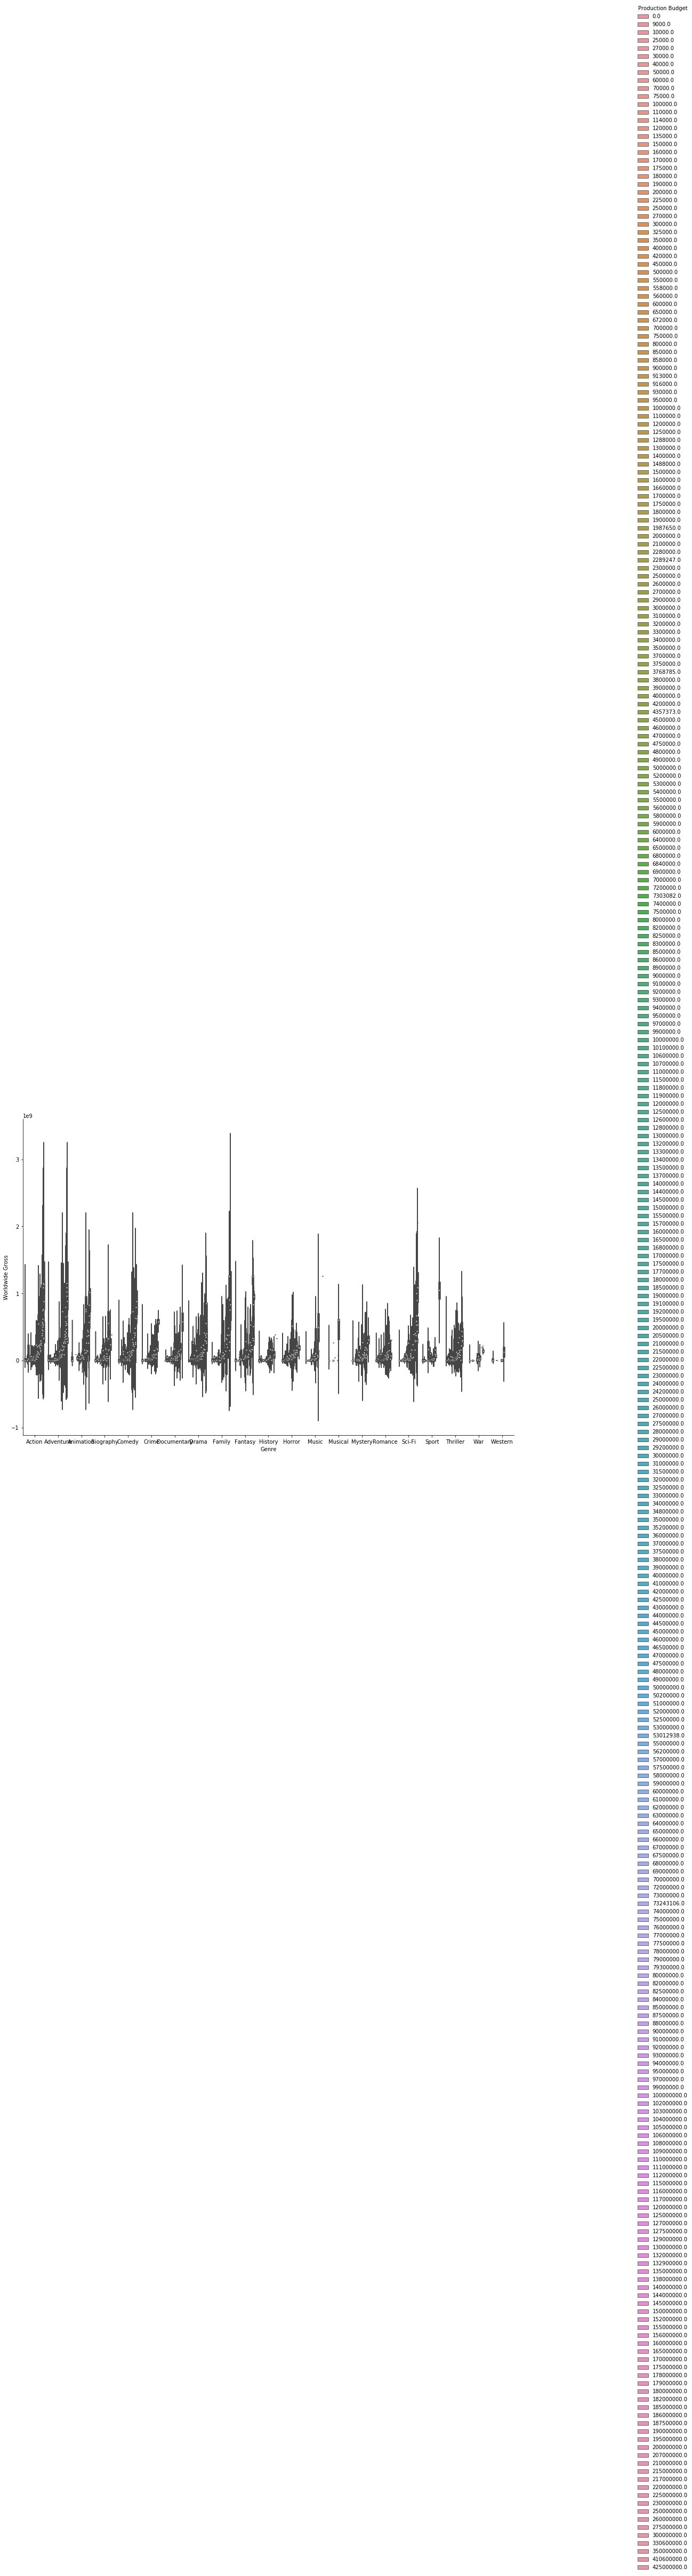

In [47]:
g = sns.catplot(x= 'Genre', y= 'Worldwide Gross', hue ='Production Budget', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- Too much information, let's break it down a little more

In [42]:
def returnRate():
    returnRate = []
    for i in GenreDF.index:
        thisGross = GenreDF['Worldwide Gross'][i]
        thisBudget = GenreDF['Production Budget'][i]
        thisIncrease = thisGross - thisBudget
        thisRate = (thisIncrease / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

- This returnRate function brought divide by zero errors. So I reset the index to the DF.

# We're Getting Somewhere!

In [43]:
def returnRate2():
    returnRate = []
    for i in GenreDF2.index:
        thisBudget = (GenreDF2['Production Budget'][i])
        if (thisBudget == 0):
            thisRate = 0.0
        else:
            thisGross = GenreDF2['Worldwide Gross'][i]
            thisRate = (thisGross / thisBudget) * 100
        returnRate.append(thisRate)
    return(returnRate)

In [44]:
GenreDF['Return Rate'] = returnRate2()

In [45]:
GenreDF.head()

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate
0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000


# Try plotting again:

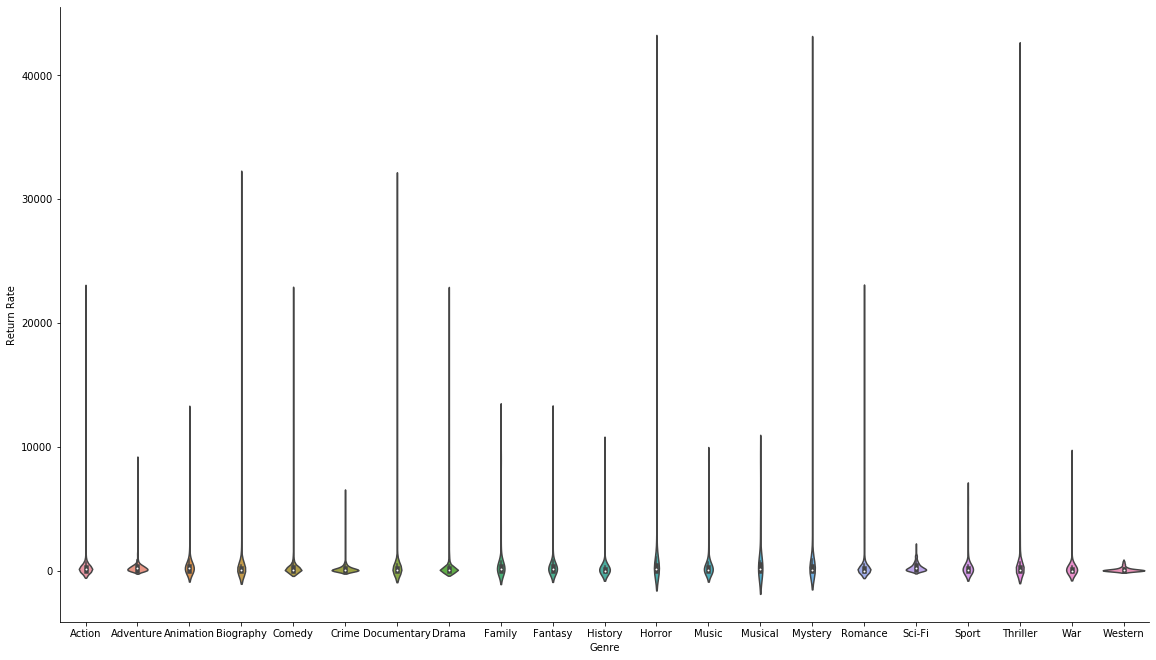

In [52]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

- What if we focus on the top grossing genres, and then plot the rate of return on those?

In [46]:
GenreDF2= GenreDF.loc[(GenreDF['Genre']== 'Action')    |
                      (GenreDF['Genre']== 'Adventure') |
                      (GenreDF['Genre']== 'Animation') |
                      (GenreDF['Genre']== 'Fantasy')   |
                      (GenreDF['Genre']== 'SciFi')     |
                      (GenreDF['Genre']== 'Musical')]

In [47]:
GenreDF2

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate
0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000
...,...,...,...,...,...,...,...
39,The Ghastly Love of Johnny X,Musical,2436.0,0.0,2436.0,2000000.0,0.121800
40,The Greatest Showman,Musical,174300000.0,260700000.0,386665550.0,84000000.0,460.316131
41,The Last Five Years,Musical,147299.0,57999.0,205298.0,2000000.0,10.264900
42,West Side Story,Musical,43700000.0,0.0,43700000.0,6000000.0,728.333333


In [50]:
GenreDF2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2045 entries, 0 to 43
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              2045 non-null   object 
 1   Genre              2045 non-null   object 
 2   Domestic Gross     2045 non-null   float64
 3   Foreign Gross      2045 non-null   float64
 4   Worldwide Gross    2045 non-null   float64
 5   Production Budget  2045 non-null   float64
 6   Return Rate        2045 non-null   float64
dtypes: float64(5), object(2)
memory usage: 127.8+ KB


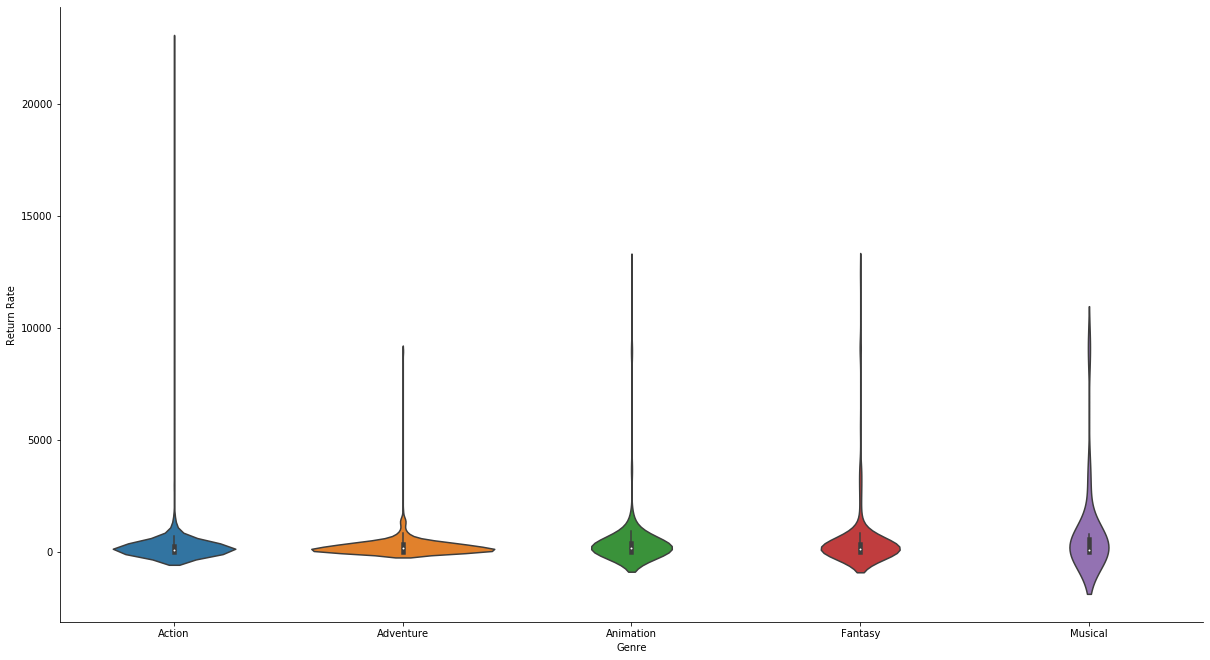

In [56]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF2)

g.fig.set_figwidth(20)
g.fig.set_figheight(10)

# Getting Ever Closer

- We still need to make this graph more readable, also need to have hard numbers.

In [68]:
GenreDF3 = GenreDF2.loc[GenreDF2['Return Rate'] < 1000]

In [69]:
GenreDF3

,Title,Genre,Domestic Gross,Foreign Gross,Worldwide Gross,Production Budget,Return Rate
0,'71,Action,1300000.0,355000.0,1655000.0,0.0,0.000000
1,12 Rounds,Action,12234694.0,5071954.0,17306648.0,20000000.0,86.533240
2,12 Strong,Action,45800000.0,21600000.0,71118378.0,35000000.0,203.195366
3,13 Assassins,Action,803000.0,16800000.0,17603000.0,0.0,0.000000
4,14 Blades,Action,0.0,3800000.0,3800000.0,0.0,0.000000
...,...,...,...,...,...,...,...
39,The Ghastly Love of Johnny X,Musical,2436.0,0.0,2436.0,2000000.0,0.121800
40,The Greatest Showman,Musical,174300000.0,260700000.0,386665550.0,84000000.0,460.316131
41,The Last Five Years,Musical,147299.0,57999.0,205298.0,2000000.0,10.264900
42,West Side Story,Musical,43700000.0,0.0,43700000.0,6000000.0,728.333333


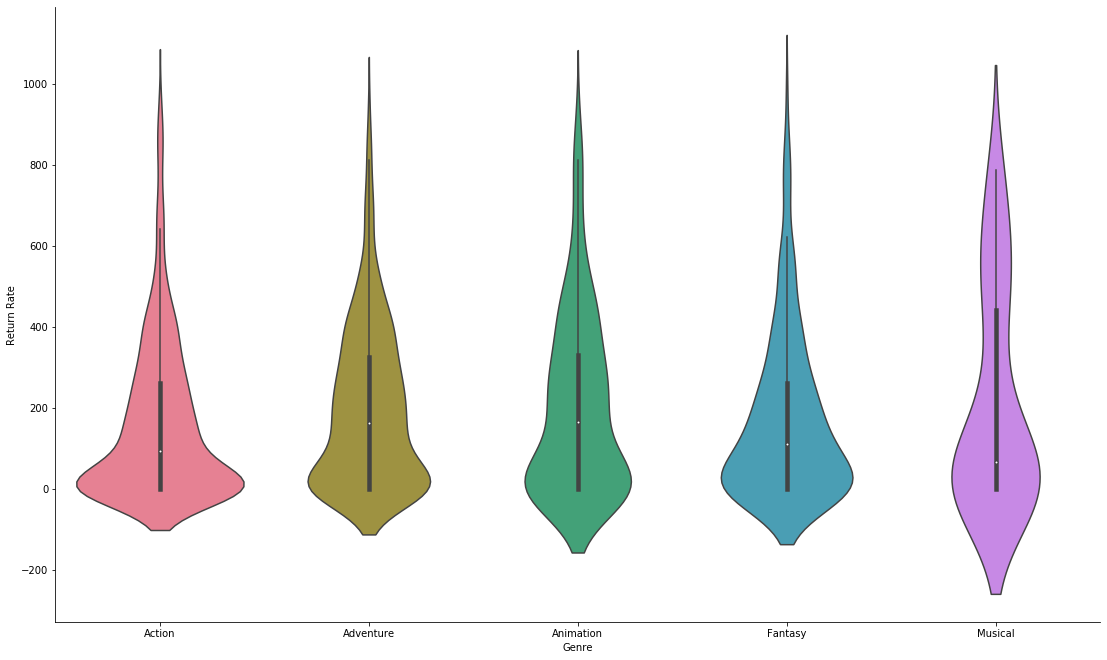

In [80]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF3, palette =(sns.color_palette("husl", 5)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)

In [81]:
GenreDF4 = GenreDF3.loc[GenreDF3['Return Rate'] < 200]

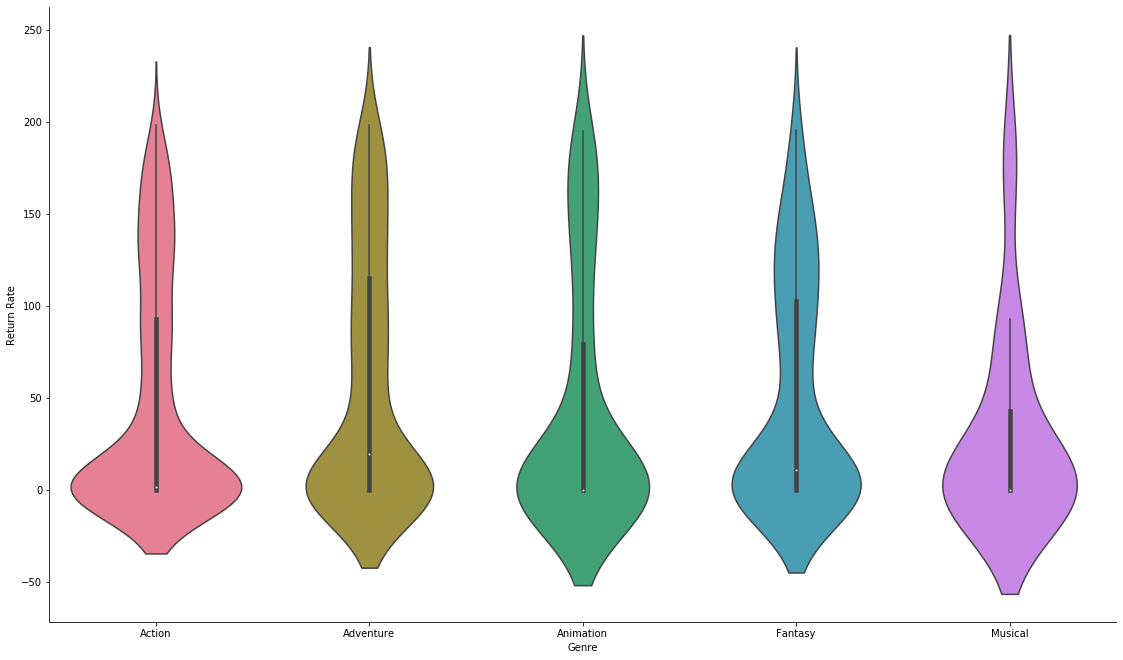

In [82]:
g = sns.catplot(x= 'Genre', y= 'Return Rate', kind='violin', data = GenreDF4, palette =(sns.color_palette("husl", 5)))

g.fig.set_figwidth(18)
g.fig.set_figheight(10)